In [1]:
%matplotlib inline

import matplotlib
import numpy as np
import matplotlib.pyplot as plt

from matplotlib import animation, rc
from IPython.display import HTML
from ipywidgets import interact
import ipywidgets as widgets


from astropy.stats import RipleysKEstimator
import seaborn as sns

In [2]:
N = []
pos = []
age = []
count = 0
with open("ratFall.txt", "r") as f:
    for line in f:
        if line.startswith("#N: "):
            N.append(int(line.split(": ")[1]))
        elif line.startswith("#Position: "):
            cols = line.split()[1:]
            pos.append([float(i) for i in cols])
        elif line.startswith("#Age: "):
            cols = line.split()[1:]
            age.append([int(i) for i in cols])

Text(0, 0.5, 'N')

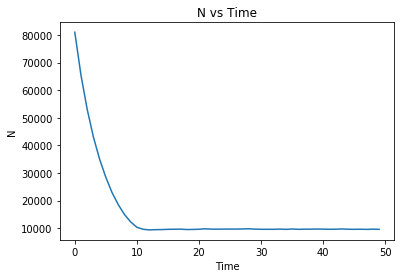

In [3]:
plt.plot(N)
plt.title("N vs Time")
plt.xlabel("Time")
plt.ylabel("N")

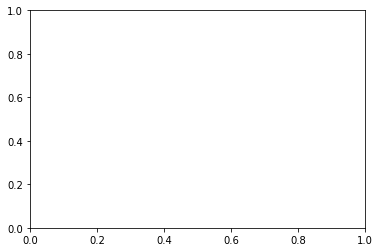

In [4]:
fig, ax = plt.subplots()

ax.set_xlim(( 0, 1))
ax.set_ylim((0, 1))

scat = ax.scatter([], [])

def init():
    scat.set_offsets(np.c_[[], []])
    return (scat)

def animate(i):
    x = pos[i][::2]
    y = pos[i][1::2]
    scat.set_offsets(np.c_[x, y])
    return (scat)

def plotSpace(i):
    x = pos[i][::2]
    y = pos[i][1::2]
    plt.scatter(x, y)
    plt.ylim(0, 1)
    plt.xlim(0, 1)
    plt.title("Agent Spatial Distribution\n t=" + str(i))

In [5]:
#anim = animation.FuncAnimation(fig, animate, init_func=init,
                               #frames=100, interval=20, )
#HTML(anim.to_html5_video())

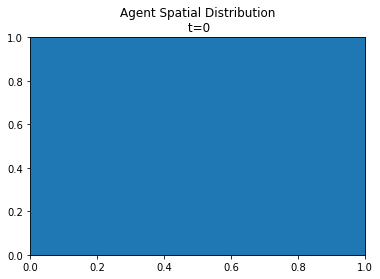

In [5]:
plotSpace(0)

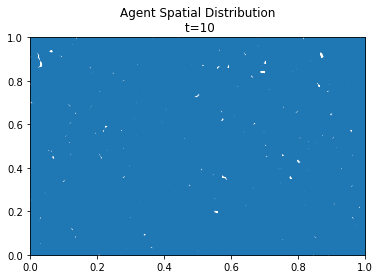

In [6]:
plotSpace(10)

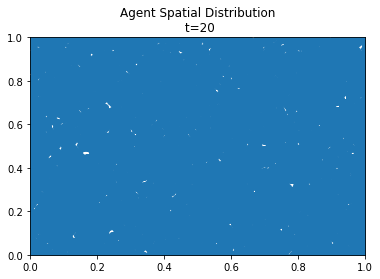

In [7]:
plotSpace(20)

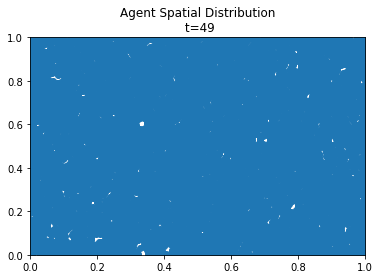

In [8]:
plotSpace(49)

In [ ]:
#interact(plotSpace, i = widgets.IntSlider(value=0,
#                                               min=0,
#                                               max=99,
#                                              step=5))

# K Function

In [9]:
def plotK(j):
    Kest = RipleysKEstimator(area=1, x_max=1, y_max=1, x_min=0, y_min=0)
    r = np.linspace(0, 1, 100)
    plt.plot(r, Kest.poisson(r), color='black', ls=':', label=r'$K_{expected}$')
    x = pos[j][::2]
    y = pos[j][1::2]
    z = np.array([[x[0],y[0]]])
    for i in range(1, len(x)):
       z = np.append(z, [[x[i], y[i]]], axis=0)
    plt.plot(r, Kest(data=z, radii=r, mode='translation'), color='green',
             label=r'$K_{observed}$')
    plt.title("Ripley's K vs radius\n  t="+str(j))
    plt.xlabel("radius")
    plt.ylabel("Ripley's K")
    plt.legend()

In [23]:
#plotK(0)

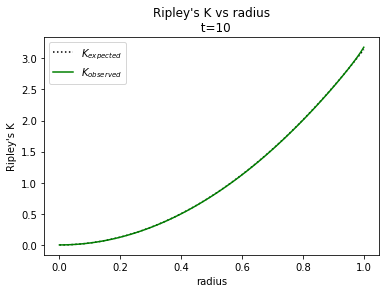

In [11]:
plotK(10)

In [ ]:
plotK(20)

In [ ]:
plotK(49)

In [ ]:
#interact(plotK, j = widgets.IntSlider(value=0,
#                                               min=0,
 #                                              max=99,
 #                                              step=5))

# L Function

In [25]:
def plotL(j):
    Kest = RipleysKEstimator(area=1, x_max=1, y_max=1, x_min=0, y_min=0)
    r = np.linspace(0, 1, 100)
    x = pos[j][::2]
    y = pos[j][1::2]
    z = np.array([[x[0],y[0]]])
    for i in range(1, len(x)):
       z = np.append(z, [[x[i], y[i]]], axis=0)
    plt.plot(r, (Kest.poisson(r)/np.pi)**2, color='black', ls=':', label=r'$L_{expected}$')
    plt.plot(r, (Kest(data=z, radii=r, mode='translation')/np.pi)**2, color='green',
             label=r'$L_{observed}$')
    plt.title("Ripley's L vs radius\n  t="+str(j))
    plt.xlabel("radius")
    plt.ylabel("Ripley's L")
    plt.legend()

In [ ]:
plotL(0)

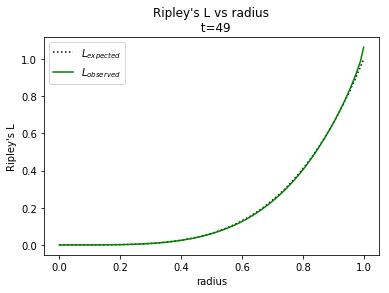

In [26]:
plotL(49)

In [ ]:
#interact(plotL, j = widgets.IntSlider(value=0,
#                                               min=0,
#                                               max=99,
#                                               step=5))

In [13]:
def agePlot(i):
    sns.distplot(age[i], hist=True, kde=True, 
             color = 'darkblue', 
             hist_kws={'edgecolor':'black'},
             kde_kws={'linewidth': 4}, label="test")
    plt.title("Density Plot of Age\n  t="+str(i))
    plt.xlabel("Age")
    plt.ylabel("Density")

/home/nathan/anaconda3/lib/python3.6/site-packages/statsmodels/nonparametric/kde.py:488: RuntimeWarning: invalid value encountered in true_divide
  binned = fast_linbin(X, a, b, gridsize) / (delta * nobs)
/home/nathan/anaconda3/lib/python3.6/site-packages/statsmodels/nonparametric/kdetools.py:34: RuntimeWarning: invalid value encountered in double_scalars
  FAC1 = 2*(np.pi*bw/RANGE)**2


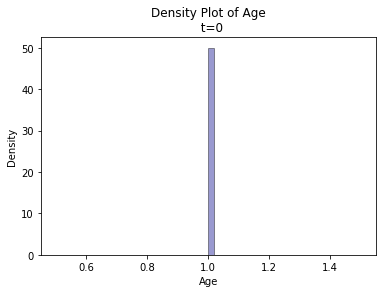

In [14]:
agePlot(0)

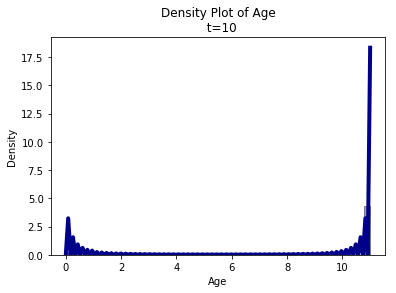

In [15]:
agePlot(10)

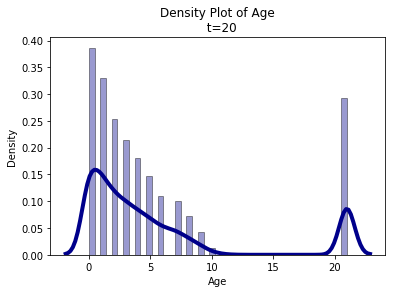

In [16]:
agePlot(20)

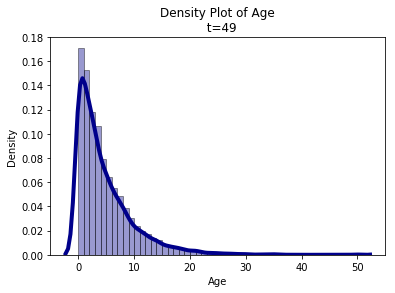

In [17]:
agePlot(49)

In [ ]:
#interact(agePlot, i = widgets.IntSlider(value=0,
#                                               min=0,
#                                               max=99,
#                                               step=5))

(array([72., 37., 23.,  9., 12.,  2.,  0.,  0.,  0.,  4.]),
 array([21. , 23.9, 26.8, 29.7, 32.6, 35.5, 38.4, 41.3, 44.2, 47.1, 50. ]),
 <a list of 10 Patch objects>)

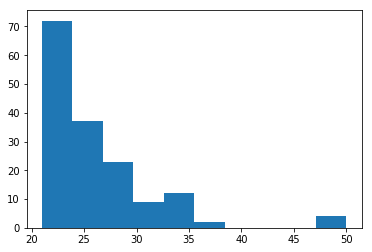

In [22]:
plt.hist([i for i in age[49] if i > 20])